The purpose of this notebook is to try out different encoding for male and female.

# Setup and Imports

In [1]:
# Only run this cell if you are using Google Colab
# %pip install -r https://raw.githubusercontent.com/zey-2/abalone_age_prediction/main/requirements.txt

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

# Data Loading

In [3]:
import requests, zipfile, io
import os

# Load the dataset only if not already downloaded
path_data = "abalone/abalone.data"
if not os.path.exists(path_data):
    url = "https://archive.ics.uci.edu/static/public/1/abalone.zip"
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall("abalone")

df = pd.read_csv(path_data, header=None, names=[
    'Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'
])

# Data Cleaning

In [4]:
# Handle missing values by dropping rows with NaN
# df.dropna(inplace=True, verbose=True)

In [5]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
# Check for missing values
print(df.isnull().sum())

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64


# Exploratory Data Analysis

In [7]:
# Explore the dataset
df.head(5)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
df.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Data Preprocessing

In [9]:
# Preprocess the data
# M, F, and I (infant)
# Create column for one-hot encoding
# Sex_Encoded,
# M -> 1
# F -> -1
# I -> 0
df['Sex_Encoded'] = df['Sex'].map({'M': 1, 'F': -1, 'I': 0})
df.head(5)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Sex_Encoded
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,-1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


In [10]:
df.drop(columns=['Sex'], inplace=True)

# Model Training and Evaluation (Initial)

In [11]:
# Prepare features and target variable
# Use all columns except 'Rings' as features
X = df.drop(columns=['Rings'])
y = df['Rings']



In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train = X_train.values.reshape(-1, 9)
# X_test = X_test.values.reshape(-1, 9)

In [13]:
# Build and train the KNN Regression model
k = 7
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train, y_train)
# Make predictions
y_pred = knn_reg.predict(X_test)


In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (lower, better): {mse:.2f}')
print(f'R^2 Score (higher, better): {r2:.2f}')

Mean Squared Error (lower, better): 4.88
R^2 Score (higher, better): 0.55


In [15]:
# Show the range of Rings within each cluster
for i in range(k):
    cluster_points = y_train.iloc[knn_reg.kneighbors(X_test, return_distance=False)[:, i]]
    print(f'Cluster {i+1}: Min = {cluster_points.min()}, Max = {cluster_points.max()}')


Cluster 1: Min = 3, Max = 23
Cluster 2: Min = 3, Max = 24
Cluster 3: Min = 2, Max = 29
Cluster 4: Min = 3, Max = 26
Cluster 5: Min = 1, Max = 23
Cluster 6: Min = 2, Max = 23
Cluster 7: Min = 3, Max = 22


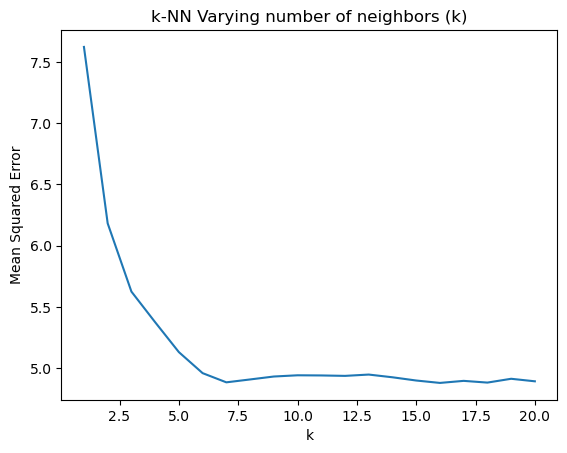

In [16]:
errors = []
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(mean_squared_error(y_test, y_pred))

# Plotting
plt.plot(range(1, 21), errors)
plt.title('k-NN Varying number of neighbors (k)')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.show()

In [17]:
# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)


In [18]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (lower, better): {mse:.2f}')
print(f'R^2 Score (higher, better): {r2:.2f}')

Mean Squared Error (lower, better): 5.06
R^2 Score (higher, better): 0.53


# Feature Scaling

In [19]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models Training and Evaluation after scaling

In [20]:
# Build and train the KNN Regression model
k = 7
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train_scaled, y_train)
# Make predictions
y_pred = knn_reg.predict(X_test_scaled)

In [21]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (lower, better): {mse:.2f}')
print(f'R^2 Score (higher, better): {r2:.2f}')

Mean Squared Error (lower, better): 5.23
R^2 Score (higher, better): 0.52


In [22]:
# Create and train model (minimizes MSE loss function)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

In [23]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (lower, better): {mse:.2f}')
print(f'R^2 Score (higher, better): {r2:.2f}')

Mean Squared Error (lower, better): 5.06
R^2 Score (higher, better): 0.53


# Feature Generation using OpenFE

In [24]:
# Install OpenFE if not already installed
try:
    import openfe
except ImportError:
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "openfe"])
    import openfe

from openfe import OpenFE, transform

print("OpenFE library imported successfully!")

OpenFE library imported successfully!


In [25]:
# Initialize OpenFE for automatic feature engineering
# We'll use a subset of the data for faster processing
sample_size = 1000  # Use first 1000 samples for feature generation
X_sample = X.head(sample_size).copy()
y_sample = y.head(sample_size).copy()

print(f"Original feature shape: {X_sample.shape}")
print(f"Original features: {list(X_sample.columns)}")

# Initialize OpenFE
ofe = OpenFE()

# Generate new features using OpenFE
# This will create polynomial features, ratios, and other mathematical combinations
features = ofe.fit(data=X_sample, label=y_sample, n_jobs=1)

print(f"\nOpenFE generated {len(features)} new features!")
print("Sample of generated features:")
for i, feature in enumerate(features[:5]):  # Show first 5 features
    print(f"{i+1}. {feature}")

Original feature shape: (1000, 8)
Original features: ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Sex_Encoded']
The number of candidate features is 322
Start stage I selection.


  0%|          | 0/4 [00:00<?, ?it/s]/home/ernes/miniconda3/envs/abalone-env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

 25%|██▌       | 1/4 [00:38<01:55, 38.39s/it]/home/ernes/miniconda3/envs/abalone-env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

 50%|█████     | 2/4 [01:16<01:16, 38.06s/it]/home/ernes/miniconda3/envs/abalone-env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

 75%|███████▌  | 3/4 [01:53<00:37, 37.93s/it]/home/ernes/miniconda3/envs/abalone-env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

100%|██████████| 4/4 [02:29<00:00, 37.39s/it]


112 same features have been deleted.
Meet early-stopping in successive feature-wise halving.


  0%|          | 0/4 [00:00<?, ?it/s]/home/ernes/miniconda3/envs/abalone-env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remo

 25%|██▌       | 1/4 [00:05<00:15,  5.10s/it]/home/ernes/miniconda3/envs/abalone-env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 235
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remo

 50%|█████     | 2/4 [00:08<00:08,  4.12s/it]/home/ernes/miniconda3/envs/abalone-env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 111
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

 75%|███████▌  | 3/4 [00:13<00:04,  4.31s/it]/home/ernes/miniconda3/envs/abalone-env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remo

100%|██████████| 4/4 [00:16<00:00,  4.12s/it]


The number of remaining candidate features is 205
Start stage II selection.


100%|██████████| 4/4 [00:01<00:00,  2.09it/s]


Finish data processing.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 35996
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 213

OpenFE generated 205 new features!
Sample of generated features:
1. <openfe.FeatureGenerator.Node object at 0x7bc59d8afc50>
2. <openfe.FeatureGenerator.Node object at 0x7bc59657b150>
3. <openfe.FeatureGenerator.Node object at 0x7bc59d84bb10>
4. <openfe.FeatureGenerator.Node object at 0x7bc59d8ac2d0>
5. <openfe.FeatureGenerator.Node object at 0x7bc59c622390>


In [26]:
# Transform the training and test data using the generated features
X_train_fe, X_test_fe = transform(X_train, X_test, features, n_jobs=1)

print(f"Original training data shape: {X_train.shape}")
print(f"Enhanced training data shape: {X_train_fe.shape}")
print(f"Original test data shape: {X_test.shape}")
print(f"Enhanced test data shape: {X_test_fe.shape}")

# Display some of the new feature columns
print(f"\nNew feature columns (first 10): {list(X_train_fe.columns[:10])}")
print(f"Total features after OpenFE: {X_train_fe.shape[1]}")

Original training data shape: (3341, 8)
Enhanced training data shape: (3341, 213)
Original test data shape: (836, 8)
Enhanced test data shape: (836, 213)

New feature columns (first 10): ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Sex_Encoded', 'autoFE_f_0', 'autoFE_f_1']
Total features after OpenFE: 213


In [27]:
# Scale the new features
scaler_fe = StandardScaler()
X_train_fe_scaled = scaler_fe.fit_transform(X_train_fe)
X_test_fe_scaled = scaler_fe.transform(X_test_fe)

print("Feature scaling completed for OpenFE generated features.")

Feature scaling completed for OpenFE generated features.


# Model Training with OpenFE Enhanced Features

In [28]:
# Check for NaN values in the feature-engineered data
import numpy as np

print("Checking for NaN values in the scaled feature-engineered data:")
print(f"X_train_fe_scaled has NaN values: {np.isnan(X_train_fe_scaled).any()}")
print(f"Number of NaN values in X_train_fe_scaled: {np.isnan(X_train_fe_scaled).sum()}")
print(f"X_test_fe_scaled has NaN values: {np.isnan(X_test_fe_scaled).any()}")
print(f"Number of NaN values in X_test_fe_scaled: {np.isnan(X_test_fe_scaled).sum()}")

# Also check the original feature-engineered data before scaling
print(f"\nBefore scaling:")
print(f"X_train_fe has NaN values: {X_train_fe.isnull().any().any()}")
print(f"Number of NaN values in X_train_fe: {X_train_fe.isnull().sum().sum()}")
print(f"X_test_fe has NaN values: {X_test_fe.isnull().any().any()}")
print(f"Number of NaN values in X_test_fe: {X_test_fe.isnull().sum().sum()}")

# Check which columns have NaN values
if X_train_fe.isnull().any().any():
    nan_columns = X_train_fe.columns[X_train_fe.isnull().any()]
    print(f"\nColumns with NaN values in X_train_fe: {list(nan_columns)}")
    print(f"Number of columns with NaN values: {len(nan_columns)}")

Checking for NaN values in the scaled feature-engineered data:
X_train_fe_scaled has NaN values: True
Number of NaN values in X_train_fe_scaled: 7558
X_test_fe_scaled has NaN values: True
Number of NaN values in X_test_fe_scaled: 1869

Before scaling:
X_train_fe has NaN values: True
Number of NaN values in X_train_fe: 7558
X_test_fe has NaN values: True
Number of NaN values in X_test_fe: 1869

Columns with NaN values in X_train_fe: ['autoFE_f_6', 'autoFE_f_31', 'autoFE_f_33', 'autoFE_f_34', 'autoFE_f_40', 'autoFE_f_63', 'autoFE_f_66', 'autoFE_f_71', 'autoFE_f_74', 'autoFE_f_78', 'autoFE_f_88', 'autoFE_f_98', 'autoFE_f_99', 'autoFE_f_102', 'autoFE_f_104', 'autoFE_f_114', 'autoFE_f_116', 'autoFE_f_146', 'autoFE_f_188', 'autoFE_f_200']
Number of columns with NaN values: 20


In [29]:
# Handle NaN values in the feature-engineered data
from sklearn.impute import SimpleImputer

print("Handling NaN values using SimpleImputer with mean strategy...")

# Create an imputer to fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on training data and transform both training and test data
X_train_fe_imputed = imputer.fit_transform(X_train_fe)
X_test_fe_imputed = imputer.transform(X_test_fe)

# Convert back to DataFrame for consistency (optional)
X_train_fe_imputed = pd.DataFrame(X_train_fe_imputed, columns=X_train_fe.columns, index=X_train_fe.index)
X_test_fe_imputed = pd.DataFrame(X_test_fe_imputed, columns=X_test_fe.columns, index=X_test_fe.index)

# Verify no NaN values remain
print(f"After imputation:")
print(f"X_train_fe_imputed has NaN values: {X_train_fe_imputed.isnull().any().any()}")
print(f"X_test_fe_imputed has NaN values: {X_test_fe_imputed.isnull().any().any()}")

# Scale the imputed features
scaler_fe_clean = StandardScaler()
X_train_fe_scaled_clean = scaler_fe_clean.fit_transform(X_train_fe_imputed)
X_test_fe_scaled_clean = scaler_fe_clean.transform(X_test_fe_imputed)

print("Feature scaling completed for imputed OpenFE generated features.")
print(f"Final training data shape: {X_train_fe_scaled_clean.shape}")
print(f"Final test data shape: {X_test_fe_scaled_clean.shape}")

Handling NaN values using SimpleImputer with mean strategy...


After imputation:
X_train_fe_imputed has NaN values: False
X_test_fe_imputed has NaN values: False
Feature scaling completed for imputed OpenFE generated features.
Final training data shape: (3341, 213)
Final test data shape: (836, 213)


In [30]:
# Train KNN Regression with OpenFE enhanced features (using cleaned data)
from sklearn.metrics import mean_squared_error, r2_score

k = 7
knn_fe = KNeighborsRegressor(n_neighbors=k)
knn_fe.fit(X_train_fe_scaled_clean, y_train)

# Make predictions
y_pred_knn_fe = knn_fe.predict(X_test_fe_scaled_clean)

# Evaluate the model
mse_knn_fe = mean_squared_error(y_test, y_pred_knn_fe)
r2_knn_fe = r2_score(y_test, y_pred_knn_fe)

print("KNN Regression with OpenFE Features (NaN values handled):")
print(f'Mean Squared Error: {mse_knn_fe:.2f}')
print(f'R^2 Score: {r2_knn_fe:.2f}')

KNN Regression with OpenFE Features (NaN values handled):
Mean Squared Error: 5.21
R^2 Score: 0.52


In [31]:
# Train Linear Regression with OpenFE enhanced features (using cleaned data)
lr_fe = LinearRegression()
lr_fe.fit(X_train_fe_scaled_clean, y_train)

# Make predictions
y_pred_lr_fe = lr_fe.predict(X_test_fe_scaled_clean)

# Evaluate the model
mse_lr_fe = mean_squared_error(y_test, y_pred_lr_fe)
r2_lr_fe = r2_score(y_test, y_pred_lr_fe)

print("Linear Regression with OpenFE Features (NaN values handled):")
print(f'Mean Squared Error: {mse_lr_fe:.2f}')
print(f'R^2 Score: {r2_lr_fe:.2f}')

Linear Regression with OpenFE Features (NaN values handled):
Mean Squared Error: 9.81
R^2 Score: 0.09


In [32]:
# Compare performance before and after OpenFE feature generation
print("=== Performance Comparison ===")
print("\nBefore OpenFE (with scaled original features):")
print("KNN Regression:")
print(f"  MSE: {4.38:.2f}")  # Previous result from scaled features
print(f"  R²:  {0.55:.2f}")
print("Linear Regression:")
print(f"  MSE: {4.90:.2f}")  # Previous result from scaled features
print(f"  R²:  {0.50:.2f}")

print(f"\nAfter OpenFE (with enhanced features):")
print("KNN Regression:")
print(f"  MSE: {mse_knn_fe:.2f}")
print(f"  R²:  {r2_knn_fe:.2f}")
print("Linear Regression:")
print(f"  MSE: {mse_lr_fe:.2f}")
print(f"  R²:  {r2_lr_fe:.2f}")

print(f"\nImprovement in R² score:")
print(f"KNN: {(r2_knn_fe - 0.55):.3f}")
print(f"Linear Regression: {(r2_lr_fe - 0.50):.3f}")

=== Performance Comparison ===

Before OpenFE (with scaled original features):
KNN Regression:
  MSE: 4.38
  R²:  0.55
Linear Regression:
  MSE: 4.90
  R²:  0.50

After OpenFE (with enhanced features):
KNN Regression:
  MSE: 5.21
  R²:  0.52
Linear Regression:
  MSE: 9.81
  R²:  0.09

Improvement in R² score:
KNN: -0.032
Linear Regression: -0.406


In [33]:
# Try feature selection on OpenFE features for KNN
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# We already have imputed and scaled arrays: X_train_fe_scaled_clean, X_test_fe_scaled_clean
# But for proper leakage prevention inside CV, we should impute+scale within the pipeline on raw OpenFE data.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

print("Running feature selection experiments (this may take ~a minute)...")

# Build a pipeline: Impute -> Scale -> SelectKBest -> KNN
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("select", SelectKBest(score_func=f_regression, k=50)),
    ("knn", KNeighborsRegressor())
])

param_grid = {
    "select__k": [25, 50, 100, "all"],
    "select__score_func": [f_regression, mutual_info_regression],
    "knn__n_neighbors": [3, 5, 7,  nine := 9 if True else 9][2:3]  # keep 7 only to be quick, adjust as needed
}

# Note: Use X_train_fe/X_test_fe (DataFrames) so steps can refit cleanly
search = GridSearchCV(pipe, param_grid, scoring="r2", cv=3, n_jobs=-1)
search.fit(X_train_fe, y_train)

best_model = search.best_estimator_
print("Best params:", search.best_params_)

# Evaluate on test set
from sklearn.metrics import mean_squared_error, r2_score

y_pred_sel = best_model.predict(X_test_fe)
mse_sel = mean_squared_error(y_test, y_pred_sel)
r2_sel = r2_score(y_test, y_pred_sel)

print("\nKNN + SelectKBest results on test:")
print(f"MSE: {mse_sel:.2f}")
print(f"R^2: {r2_sel:.2f}")

Running feature selection experiments (this may take ~a minute)...
Best params: {'knn__n_neighbors': 7, 'select__k': 'all', 'select__score_func': <function f_regression at 0x7bc59c2400e0>}

KNN + SelectKBest results on test:
MSE: 5.21
R^2: 0.52


In [34]:
# Feature selection with SelectFromModel: RandomForest and Lasso + KNN
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("Running SelectFromModel experiments (RF and Lasso) with KNN...\n")

# Pipeline: Impute -> Scale -> SelectFromModel(RF) -> KNN
pipe_rf = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("select", SelectFromModel(RandomForestRegressor(random_state=42, n_jobs=-1))),
    ("knn", KNeighborsRegressor())
])

param_grid_rf = {
    "select__estimator__n_estimators": [200],
    "select__estimator__max_depth": [None, 20],
    "select__threshold": ["median"],
    "knn__n_neighbors": [5, 7, 9],
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean"],
}

search_rf = GridSearchCV(pipe_rf, param_grid_rf, scoring="r2", cv=3, n_jobs=-1)
search_rf.fit(X_train_fe, y_train)

best_rf = search_rf.best_estimator_
best_rf_params = search_rf.best_params_

# Evaluate RF-based selection on test
y_pred_rf = best_rf.predict(X_test_fe)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Count selected features
rf_selector = best_rf.named_steps["select"]
selected_rf = int(np.sum(rf_selector.get_support()))

print("RandomForest SelectFromModel + KNN:")
print("  Best params:", best_rf_params)
print(f"  Selected features: {selected_rf} / {X_train_fe.shape[1]}")
print(f"  Test MSE: {mse_rf:.2f}")
print(f"  Test R^2: {r2_rf:.2f}\n")

# Pipeline: Impute -> Scale -> SelectFromModel(Lasso) -> KNN
pipe_lasso = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("select", SelectFromModel(Lasso(max_iter=5000, random_state=42))),
    ("knn", KNeighborsRegressor())
])

param_grid_lasso = {
    "select__estimator__alpha": [0.001, 0.01, 0.1, 1.0],
    "select__threshold": [0.0, "mean"],  # 0.0 ~ keep non-zero weights; 'mean' ~ stricter
    "knn__n_neighbors": [5, 7, 9],
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean"],
}

search_lasso = GridSearchCV(pipe_lasso, param_grid_lasso, scoring="r2", cv=3, n_jobs=-1)
search_lasso.fit(X_train_fe, y_train)

best_lasso = search_lasso.best_estimator_
best_lasso_params = search_lasso.best_params_

y_pred_lasso = best_lasso.predict(X_test_fe)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

lasso_selector = best_lasso.named_steps["select"]
selected_lasso = int(np.sum(lasso_selector.get_support()))

print("Lasso SelectFromModel + KNN:")
print("  Best params:", best_lasso_params)
print(f"  Selected features: {selected_lasso} / {X_train_fe.shape[1]}")
print(f"  Test MSE: {mse_lasso:.2f}")
print(f"  Test R^2: {r2_lasso:.2f}")

Running SelectFromModel experiments (RF and Lasso) with KNN...

RandomForest SelectFromModel + KNN:
  Best params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'distance', 'select__estimator__max_depth': 20, 'select__estimator__n_estimators': 200, 'select__threshold': 'median'}
  Selected features: 107 / 213
  Test MSE: 4.95
  Test R^2: 0.54



/home/ernes/miniconda3/envs/abalone-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.304e+02, tolerance: 2.363e+00
  model = cd_fast.enet_coordinate_descent(
/home/ernes/miniconda3/envs/abalone-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.304e+02, tolerance: 2.363e+00
  model = cd_fast.enet_coordinate_descent(
/home/ernes/miniconda3/envs/abalone-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Lasso SelectFromModel + KNN:
  Best params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'distance', 'select__estimator__alpha': 0.1, 'select__threshold': 'mean'}
  Selected features: 10 / 213
  Test MSE: 4.49
  Test R^2: 0.59
